У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cd C:\Users\Jools\Documents\DA\data

C:\Users\Jools\Documents\DA\data


In [11]:
df = pd.read_csv('yulu_rental.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

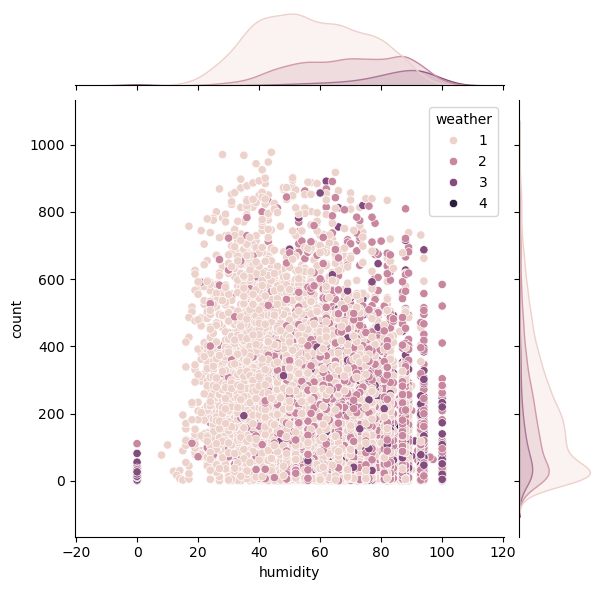

In [13]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather')

Пік активності користувачів припадає на середню вологість (40-70%) і сприятливу погоду (weather 1 і 2).
В умовах високої вологості (80-100%) кількість оренд різко зменшується, особливо при погіршенні погодних умов (weather 3 і 4).

Висновки для прийняття рішень:

Основний пік користування послугами оренди припадає на середню вологість (30-80%) і помірно сприятливу погоду (weather 1 і Це означає, що в такі дні можна очікувати більшого попиту на послугу, що допоможе оптимізувати наявність велосипедів.

В погану погоду (weather 3 і 4), особливо при високій вологості, можна очікувати значного зменшення кількості користувачів. Це може бути корисним для управління запасами, коли можна зменшити кількість доступних велосипедів та оптимізувати технічне обслуговування у несприятливі дні.

Для поганих погодних умов (weather 3 і 4), особливо при високій вологості, можливо, варто запропонувати знижки або спеціальні пропозиції для стимулювання попиту.

Враховуючи, що більша частина користувачів орендує велосипеди за помірної вологості і погоди, можна прогнозувати зростання або зниження попиту залежно від погодних прогнозів і відповідно планувати операційні заходи, такі як реклама або технічна підтримка.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

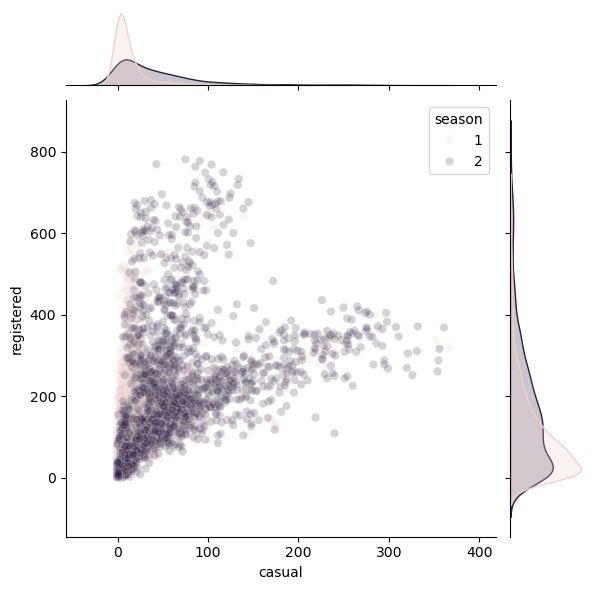

In [25]:
df_filtered_by_season = df[df['season'].isin([1, 2])]
sns.jointplot(data = df_filtered_by_season, x = 'casual', y = 'registered', hue = 'season', alpha=0.2)

У нижній частині графіка (де кількість casual низька) видно, що більше користувачів зареєстрованих (registered). Це свідчить про те, що коли кількість випадкових оренд невелика, основну частину користувачів складають зареєстровані постійні клієнти.
На рівнях, де кількість casual користувачів зростає (100-200), також зростає і кількість registered користувачів, що свідчить про паралельне збільшення обох категорій користувачів.
Вищі значення для registered (понад 400) досягаються навіть за умов низького рівня casual користувачів (до 100).

Більшість точок зосереджені в лівій частині графіка, що означає перевагу користувачів, які є зареєстрованими. Велика кількість випадкових оренд зазвичай не супроводжується значно більшими показниками оренди серед зареєстрованих користувачів.

На графіку видно, що для обох сезонів тенденція дуже схожа: більшість випадкових користувачів орендують велосипеди в межах 0-100, а зареєстровані клієнти мають ширший діапазон значень (0-800). Це може свідчити про незалежність сезону від поведінки користувачів, що зберігає стабільні показники.

1. Оскільки зареєстровані користувачі домінують, варто розробляти стратегії лояльності та програми для них, оскільки вони значною мірою впливають на обсяг оренди.
2. Кількість casual користувачів обмежена (переважно до 100 оренд за день). Для збільшення цієї аудиторії можна запропонувати акції, що спрямовані на нових клієнтів або туристів, які не є зареєстрованими.
3. Оскільки більшість оренд припадає на зареєстрованих користувачів, велосипедний парк можна оптимізувати під їхні потреби, з урахуванням підвищеного попиту влітку

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


<Axes: xlabel='weather', ylabel='humidity'>

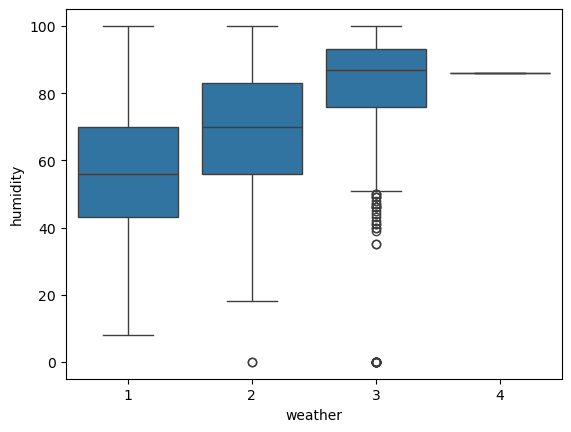

In [37]:
sns.boxplot(data=df, x = 'weather', y = 'humidity')

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

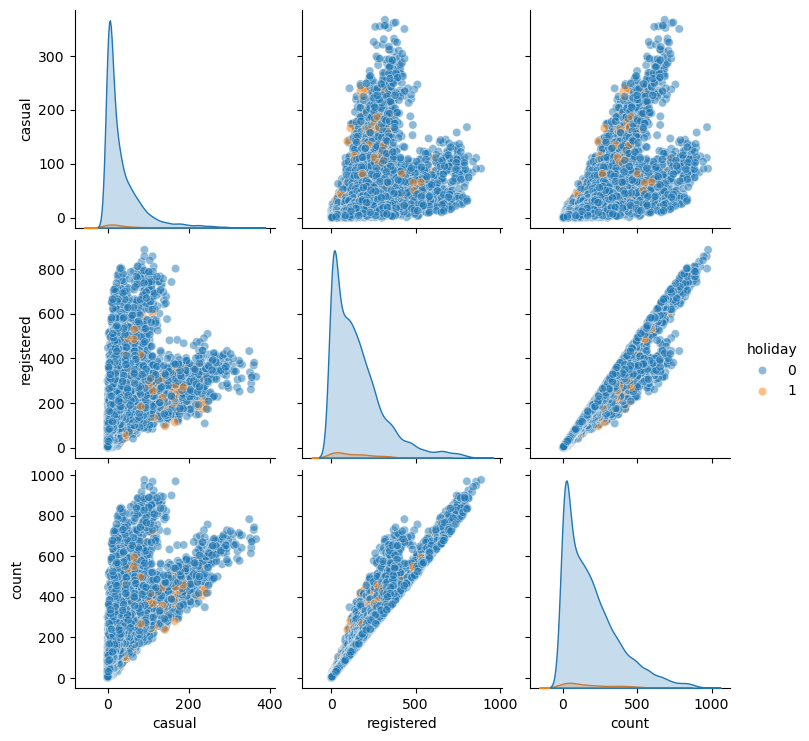

In [41]:
filtered_data = df[['casual', 'registered', 'count', 'holiday']]

sns.pairplot(filtered_data, hue='holiday',
             diag_kind='kde', plot_kws={'alpha':0.5})


У святкові дні (помаранчеві точки) видно невелику кількість випадкових оренд у порівнянні з робочими днями, що вказує на те, що велика частка орендарів у святкові дні є постійними клієнтами.
Більшість помаранчевих точок зосереджені в нижній частині графіка по осі "casual", що свідчить про те, що випадкових орендарів значно менше.

Взаємозв’язок між casual і registered у святкові дні досить схожий на робочі дні, проте в святкові дні кількість зареєстрованих користувачів зазвичай вища, навіть якщо кількість випадкових орендарів невелика.

Загальна кількість оренд також значно більша у робочі дні порівняно зі святковими.
Святкові дні мають тенденцію до меншого загального обсягу оренд. 

Розподіли на діагоналі показують, що в робочі дні кількість орендарів має значно вищу щільність при низьких значеннях для випадкових користувачів, що підтверджує, що більшість орендарів — це зареєстровані користувачі.
Святкові дні показують невелике зростання кількості орендарів у межах 200-400 оренд для зареєстрованих користувачів, але загалом цей обсяг менший порівняно з робочими днями.


5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [47]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [65]:
df['date'] = df.datetime.dt.date

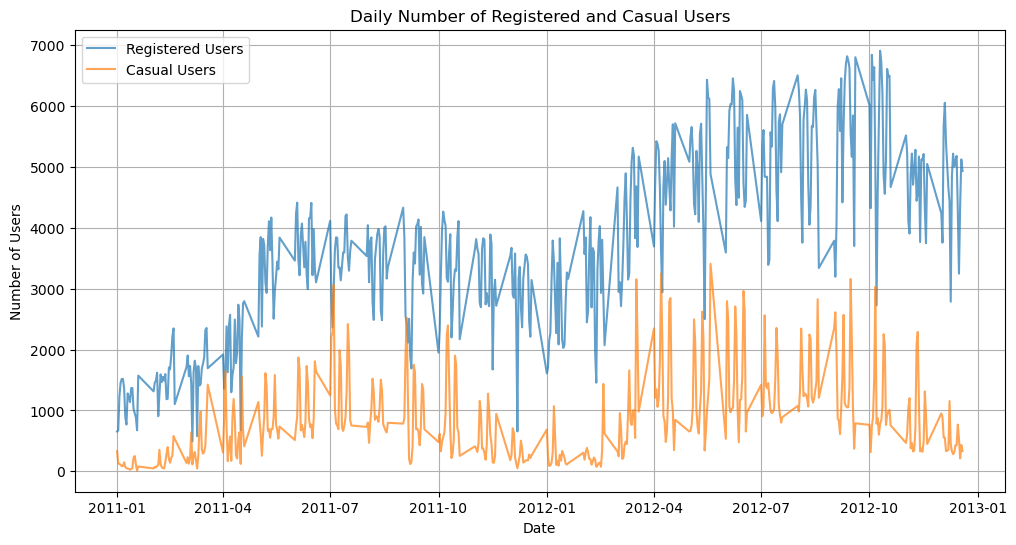

In [69]:
df_viz = df[['date', 'registered', 'casual']]
df_viz = df_viz.groupby('date').sum()

df_viz.plot(figsize=(12, 6), alpha=0.7)
plt.title('Daily Number of Registered and Casual Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend(['Registered Users', 'Casual Users'])
plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
